# 使用 TEDD 进行可视化

本节介绍使用 TEDD (Tensor Expression Debug Display) 可视化张量表达式。

加载一些库:

In [1]:
# import tvm
from tvm import te
from tvm.contrib import tedd
from graphviz import Source
from IPython.display import display_svg

定义 `add` 计算和调度:

In [2]:
A, B, C = [te.placeholder((2, 3), name=name) for name in "ABC"]

Y = A * B
Z = Y + C

s = te.create_schedule(Z.op)

## 数据流图

查看计算过程以及调度的流程图:

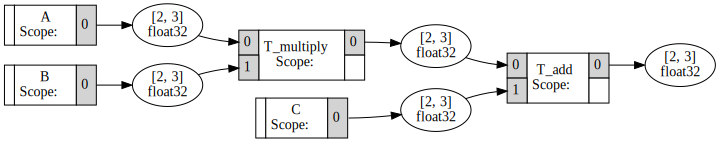

In [3]:
dot_string = tedd.viz_dataflow_graph(s, output_dot_string=True)
src = Source(dot_string)
display_svg(src)

```{note}
每个节点表示一个阶段，中间显示名称和 memory scope，两侧显示 inputs/outputs 信息。边表示节点的依赖关系。
```

## 调度树

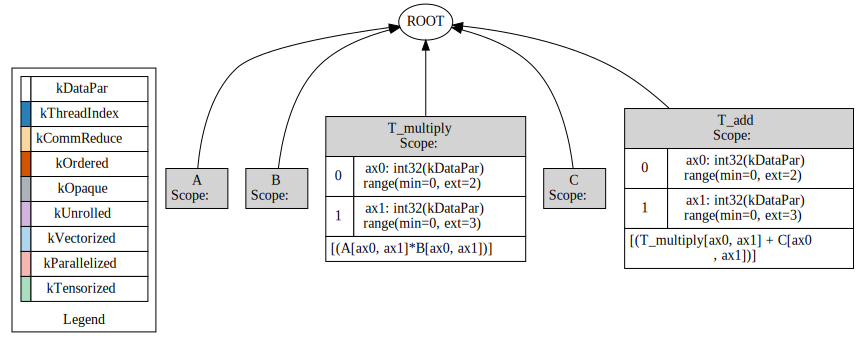

In [4]:
dot_string = tedd.viz_schedule_tree(s, output_dot_string=True)
# tedd.viz_schedule_tree(s, dot_file_path="/tmp/scheduletree.dot") # 保存到本地
src = Source(dot_string)
display_svg(src)

建议调用 `normalize()` 来推断范围信息。

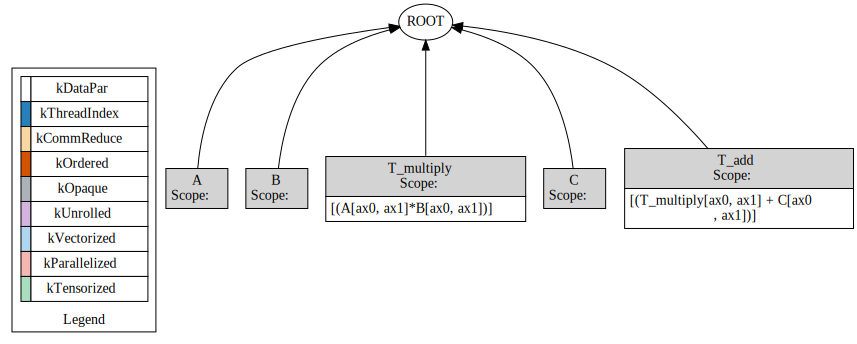

In [5]:
s = s.normalize()
# tedd.viz_schedule_tree(s, dot_file_path="/tmp/scheduletree2.dot")
dot_string = tedd.viz_schedule_tree(s, output_dot_string=True)
src = Source(dot_string)
display_svg(src)

ROOT 下的每个块代表一个阶段。阶段名称显示在顶部行，计算显示在底部行。中间的行是 IterVars，外部越高，内部越低。

## 迭代关系图

迭代关系图(IterVar Relationship Graph)。每个子图表示一个阶段，并包含 IterVar 节点和变换节点。

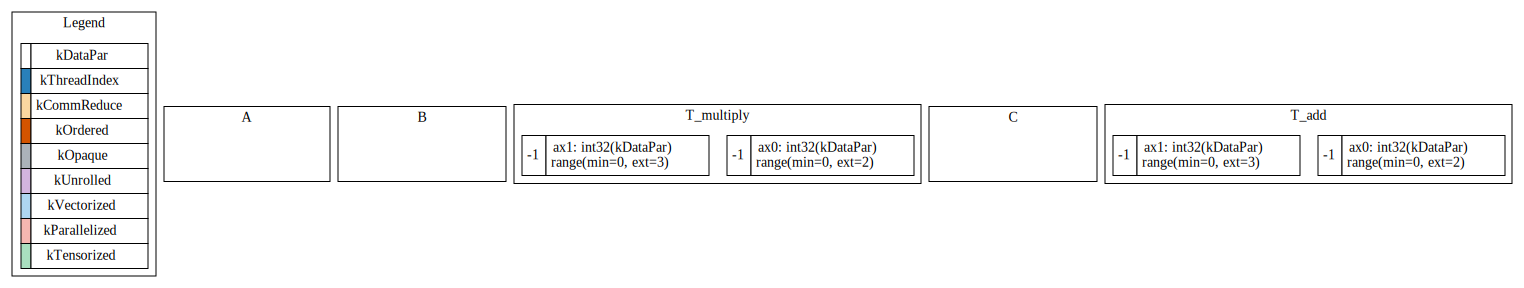

In [6]:
# tedd.viz_itervar_relationship_graph(s, dot_file_path="/tmp/itervar.dot")
dot_string = tedd.viz_itervar_relationship_graph(s, output_dot_string=True)
src = Source(dot_string)
display_svg(src)